In [225]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.tools.eval_measures as em

In [226]:
data = pd.read_excel('/Users/wangmeiyi/Desktop/100dataset/hotel_data.xlsx')
data.head()

,WEEK,DOW INDICATOR1,DEMAND,TUESDAY BOOKINGS,PICKUP RATIO,DOW INDEX
0,1,1,1470.0,1512.0,0.972222,0.864773
1,NaN,2,870.0,864.0,1.006944,0.910585
2,NaN,3,986.0,827.0,1.192261,0.972883
3,NaN,4,1247.0,952.0,1.309874,1.012525
4,NaN,5,1109.0,740.0,1.498649,1.067881


In [227]:
data.tail(25)

,WEEK,DOW INDICATOR1,DEMAND,TUESDAY BOOKINGS,PICKUP RATIO,DOW INDEX
85,NaN,2,988.0,1004.0,0.984064,0.910585
86,NaN,3,1510.0,1404.0,1.075499,0.972883
87,NaN,4,NaN,1657.0,NaN,NaN
88,NaN,5,NaN,1643.0,NaN,NaN
89,NaN,6,NaN,1124.0,NaN,NaN
90,NaN,7,NaN,1074.0,NaN,NaN
91,14,1,NaN,1839.0,NaN,NaN
92,NaN,2,NaN,1862.0,NaN,NaN
93,NaN,3,NaN,1886.0,NaN,NaN
94,NaN,4,NaN,1696.0,NaN,NaN


the pickup ratio is the result of demand/Tuesday Bookings. 
The following syntax add a new column of the turn_down_numbers. 
The Tuesday Bookings precedes a date by a number of days. Four days ahead of a Saturday date, 5 days ahead of a Sunday, 6 days ahead of a Sunday, seven days ahead of a Tueaday. Therefore, we are expecting a higher Pickup ratio for DOW indicator with 4, 5, 6,and decrease when the date goes to 7, 1, 2, 3 

We can also see from the data that for most of the weeks, the pickup ratio increase when DOW indicator increases. 

In [228]:
data['turn_down_numbers'] = data['DEMAND'] - data[' TUESDAY BOOKINGS']

In [229]:
print(data.columns)

Index(['WEEK', 'DOW INDICATOR1', 'DEMAND', ' TUESDAY BOOKINGS',
       ' PICKUP RATIO', 'DOW INDEX', 'turn_down_numbers'],
      dtype='object')


In [255]:
data['adjusted_pr'] = data[' PICKUP RATIO'] / data['DOW INDEX']
data1 = data.head(87)

In [264]:
date_range = pd.date_range(start='1987-05-23', periods=87, freq='D')
data1.index = date_range


In [265]:
data1.head()

,WEEK,DOW INDICATOR1,DEMAND,TUESDAY BOOKINGS,PICKUP RATIO,DOW INDEX,turn_down_numbers,adjusted_pr
1987-05-23,1,1,1470.0,1512.0,0.972222,0.864773,-42.0,1.124252
1987-05-24,NaN,2,870.0,864.0,1.006944,0.910585,6.0,1.105821
1987-05-25,NaN,3,986.0,827.0,1.192261,0.972883,159.0,1.225493
1987-05-26,NaN,4,1247.0,952.0,1.309874,1.012525,295.0,1.293671
1987-05-27,NaN,5,1109.0,740.0,1.498649,1.067881,369.0,1.403385


In [243]:
data1.tail

<bound method NDFrame.tail of            WEEK DOW INDICATOR1  DEMAND   TUESDAY BOOKINGS   PICKUP RATIO  \
1987-05-23    1              1  1470.0             1512.0       0.972222   
1987-05-24  NaN              2   870.0              864.0       1.006944   
1987-05-25  NaN              3   986.0              827.0       1.192261   
1987-05-26  NaN              4  1247.0              952.0       1.309874   
1987-05-27  NaN              5  1109.0              740.0       1.498649   
...         ...            ...     ...                ...            ...   
1987-08-13  NaN              6  1093.0              932.0       1.172747   
1987-08-14  NaN              7  1217.0              969.0       1.255934   
1987-08-15   13              1  1542.0             1562.0       0.987196   
1987-08-16  NaN              2   988.0             1004.0       0.984064   
1987-08-17  NaN              3  1510.0             1404.0       1.075499   

            DOW INDEX  turn_down_numbers  adjusted_pr  
1

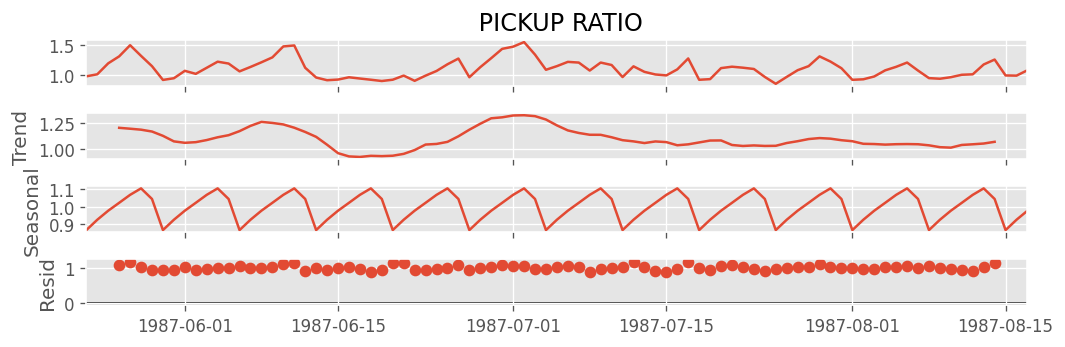

In [237]:
from statsmodels.tsa.seasonal import seasonal_decompose
# new_data.index.freq = 'D'
result = seasonal_decompose(data1[' PICKUP RATIO'], model='multiplicative')

fig = result.plot()

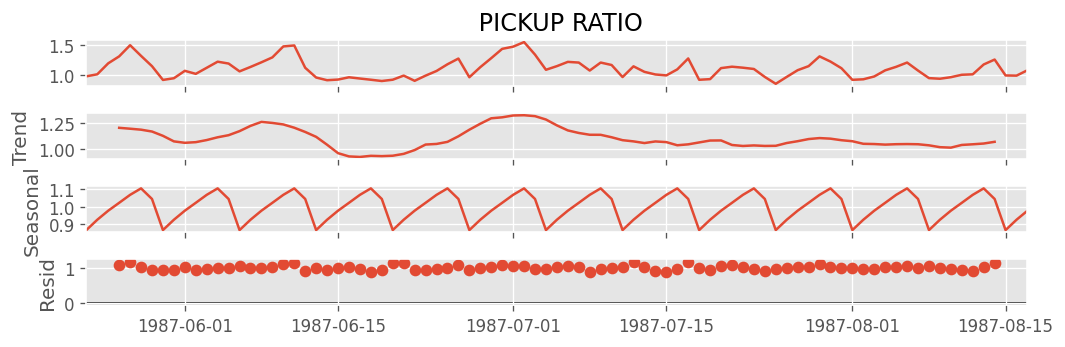

In [251]:
from statsmodels.tsa.seasonal import seasonal_decompose
# new_data.index.freq = 'D'
result1 = seasonal_decompose(data1['adjusted_pr'], model='multiplicative')

fig = result.plot()

In [124]:
data.tail(30)

,WEEK,DOW INDICATOR1,DEMAND,TUESDAY BOOKINGS,PICKUP RATIO,DOW INDEX,turn_down_numbers,adjusted_pr
80,NaN,4,1775.0,1777.0,0.998875,1.012525,-2.0,0.986518
81,NaN,5,1759.0,1748.0,1.006293,1.067881,11.0,0.942327
82,NaN,6,1093.0,932.0,1.172747,1.122727,161.0,1.044552
83,NaN,7,1217.0,969.0,1.255934,1.048626,248.0,1.197695
84,13,1,1542.0,1562.0,0.987196,0.864773,-20.0,1.141567
85,NaN,2,988.0,1004.0,0.984064,0.910585,-16.0,1.080694
86,NaN,3,1510.0,1404.0,1.075499,0.972883,106.0,1.105476
87,NaN,4,NaN,1657.0,NaN,NaN,NaN,NaN
88,NaN,5,NaN,1643.0,NaN,NaN,NaN,NaN
89,NaN,6,NaN,1124.0,NaN,NaN,NaN,NaN


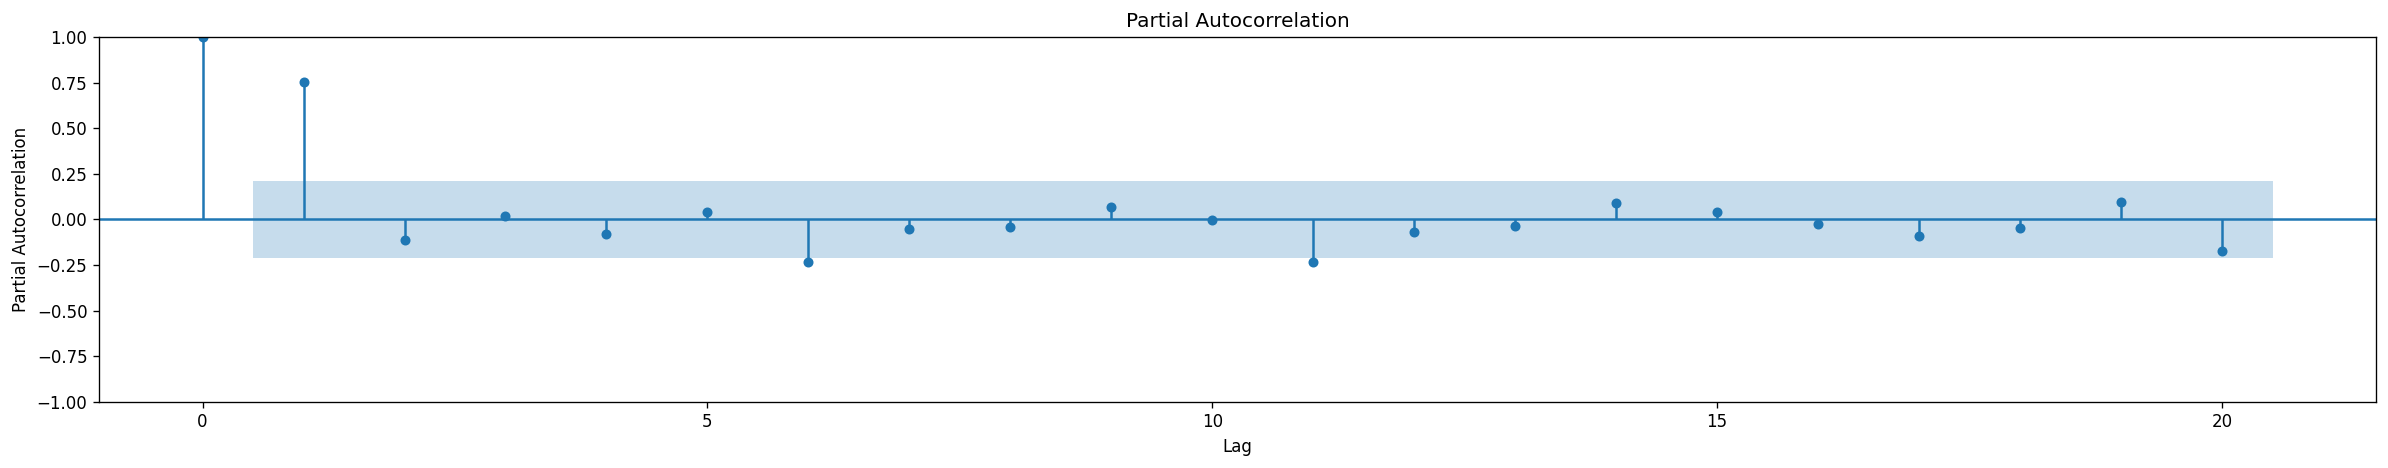

In [125]:
def pacf_analysis(data):
    partial_auto = sm.tsa.stattools.pacf(data, method='ywm')

    fig, ax = plt.subplots(figsize=(20, 4))
    plot_pacf(data, ax=ax, method='ywm')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.title('Partial Autocorrelation')
    plt.tight_layout()
    plt.show()
    
pacf_analysis(data1['adjusted_pr'])

WEEK


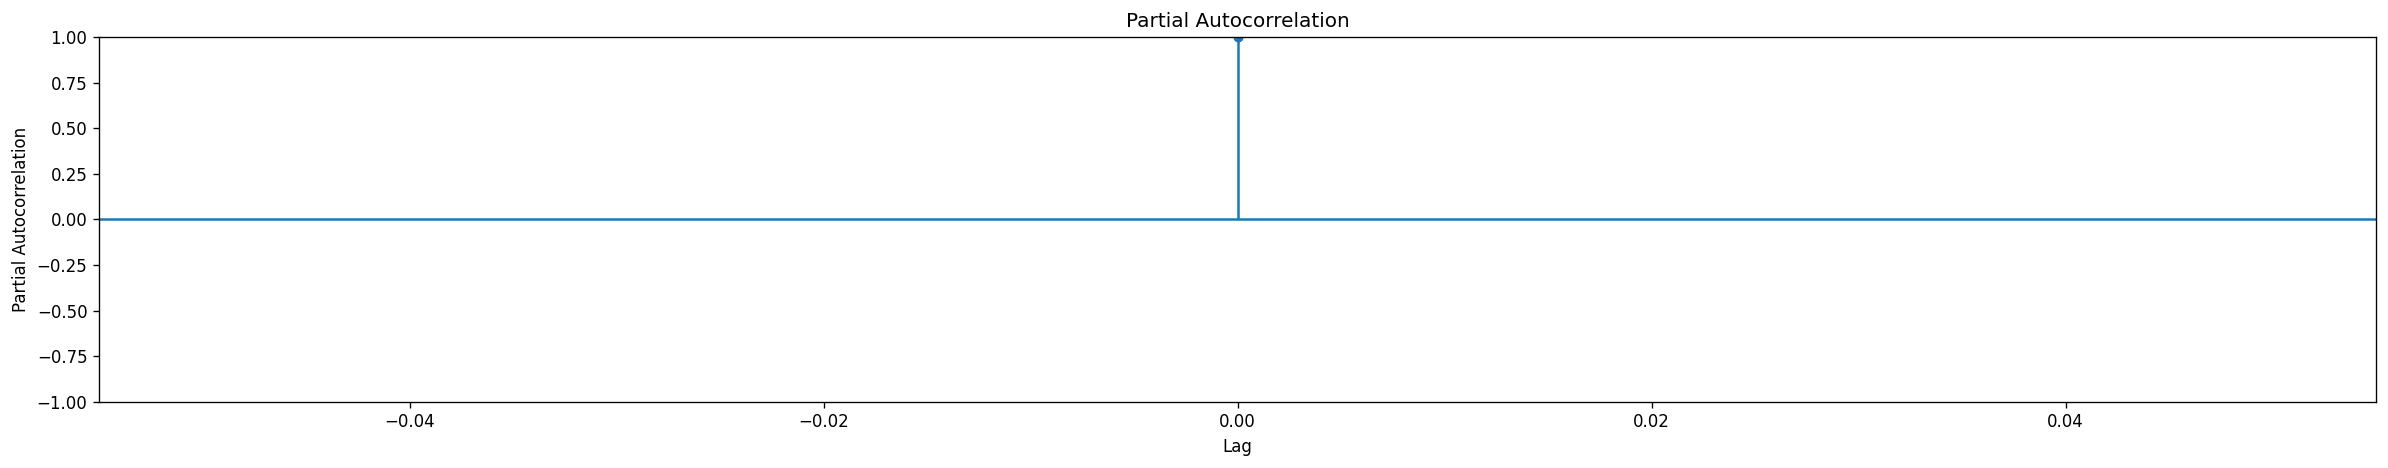

DOW INDICATOR1


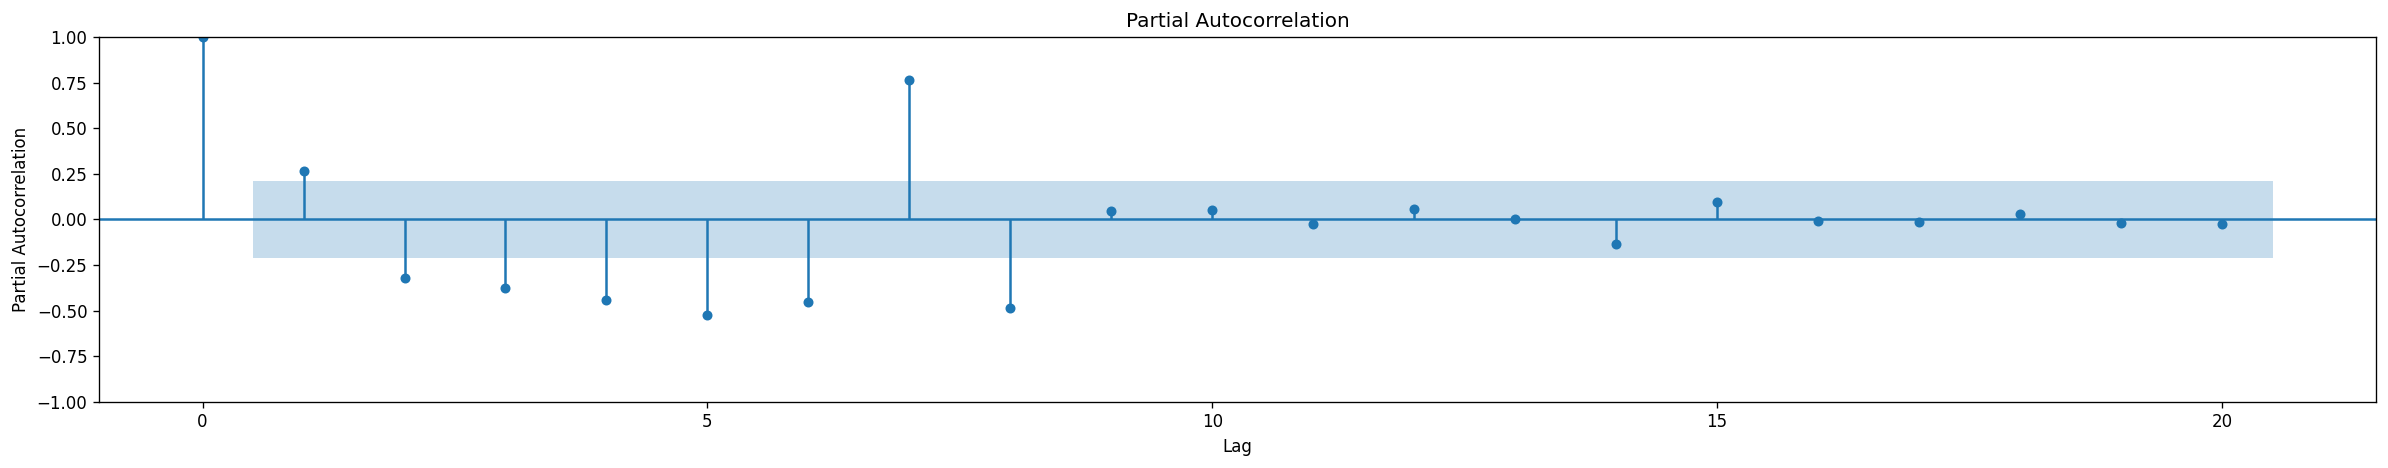

DEMAND


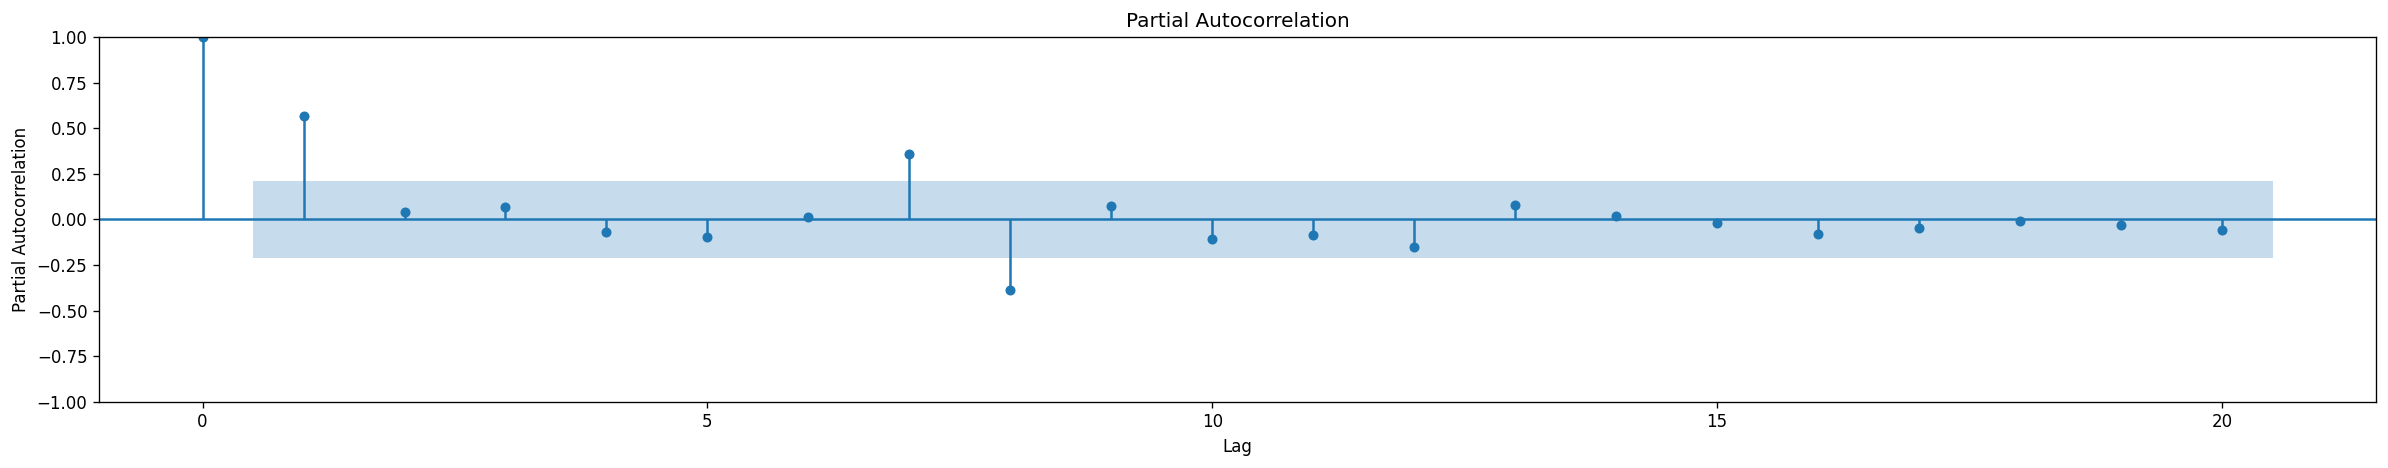

 TUESDAY BOOKINGS


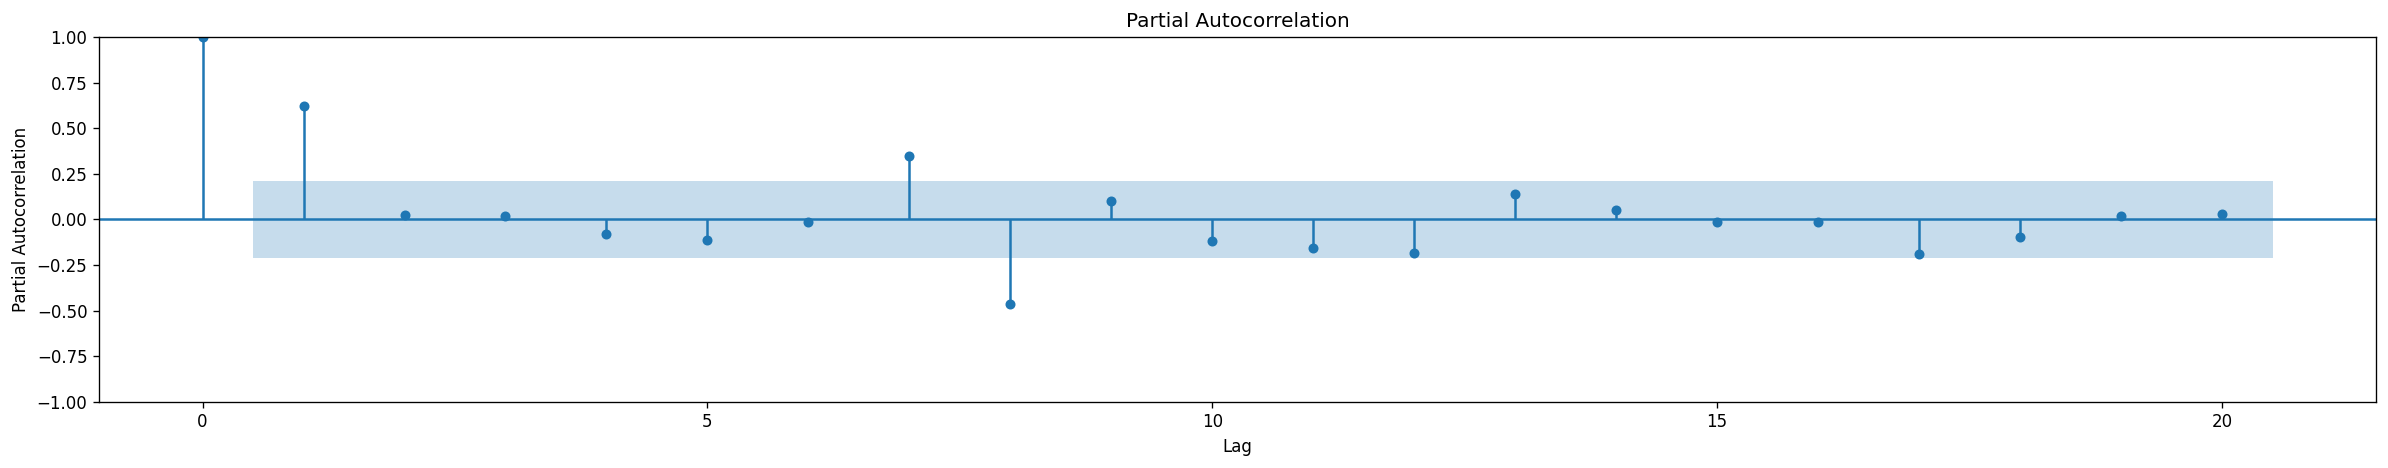

 PICKUP RATIO


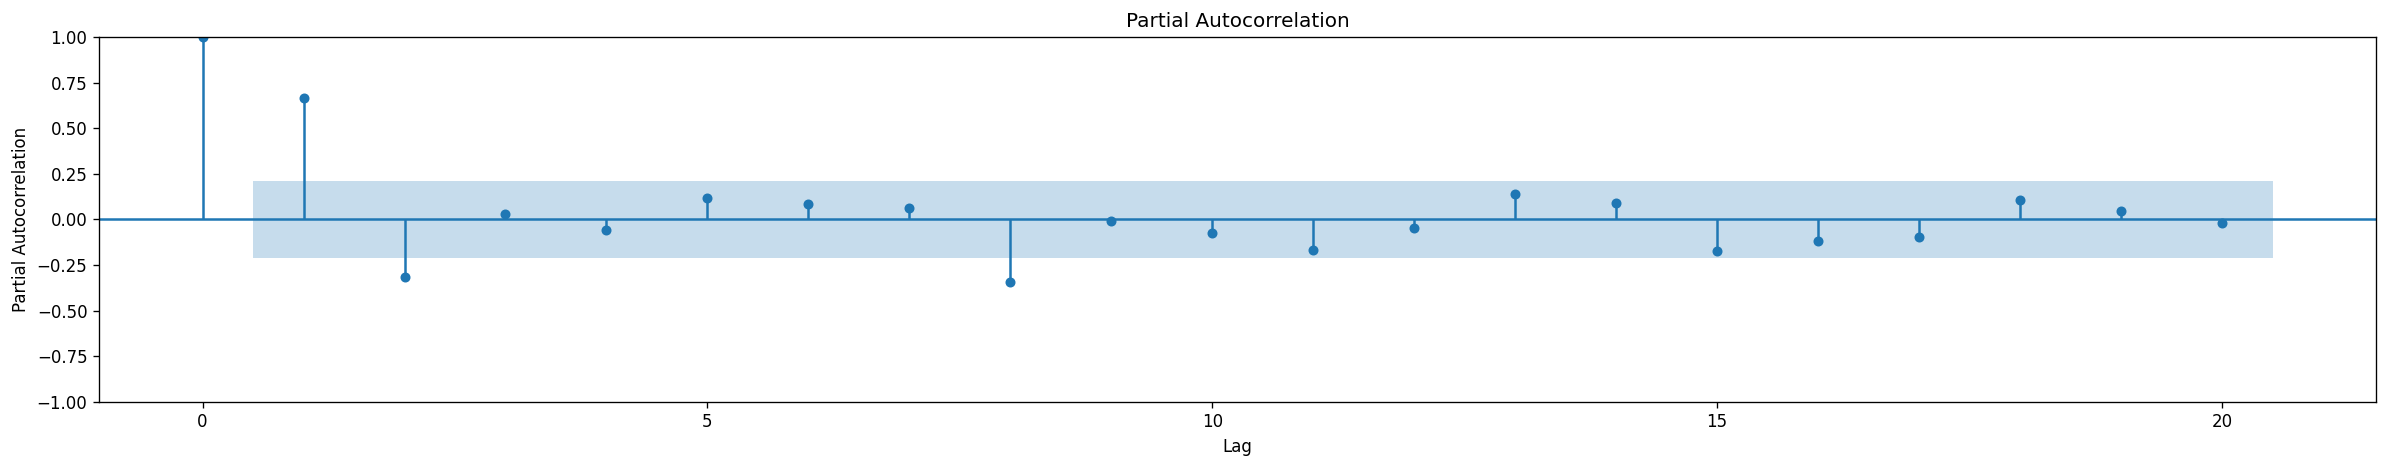

DOW INDEX


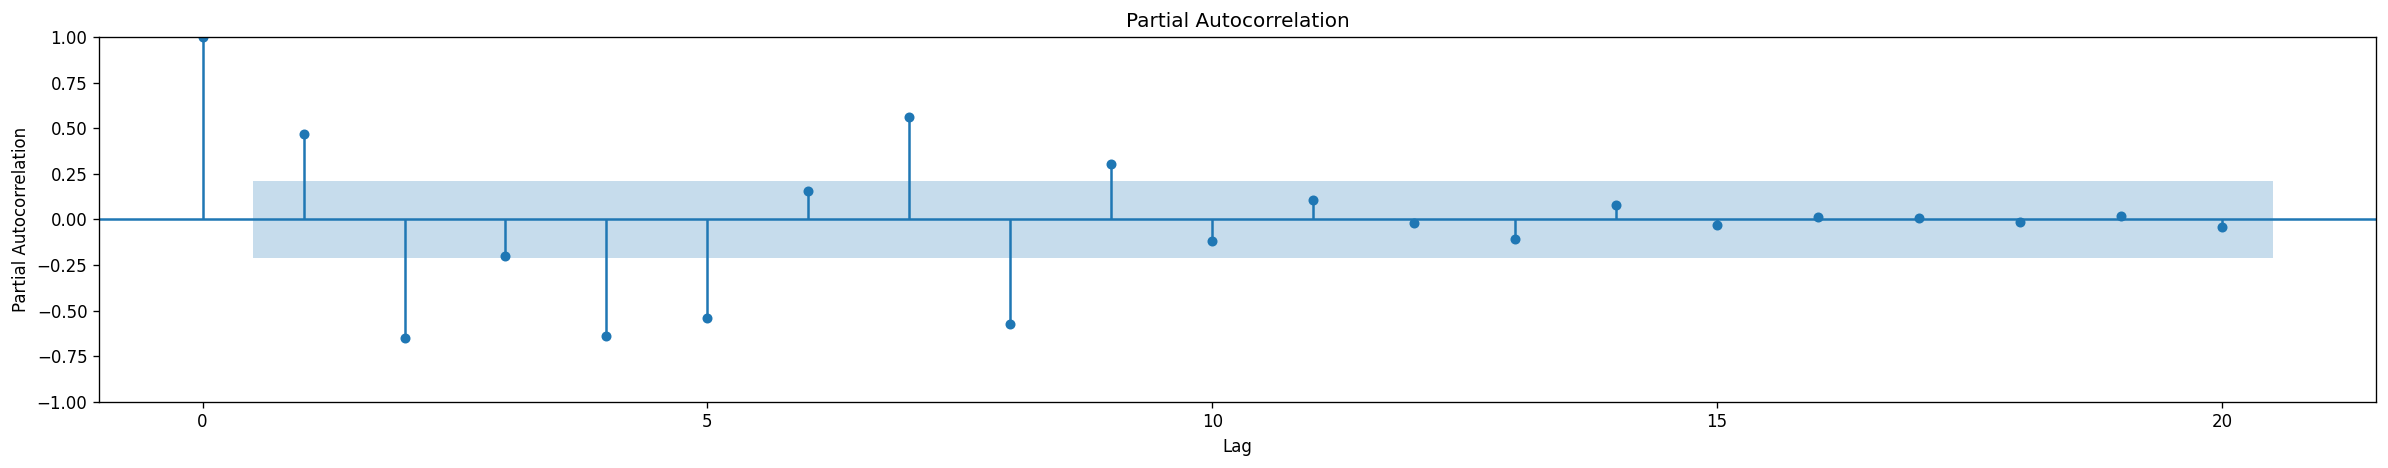

turn_down_numbers


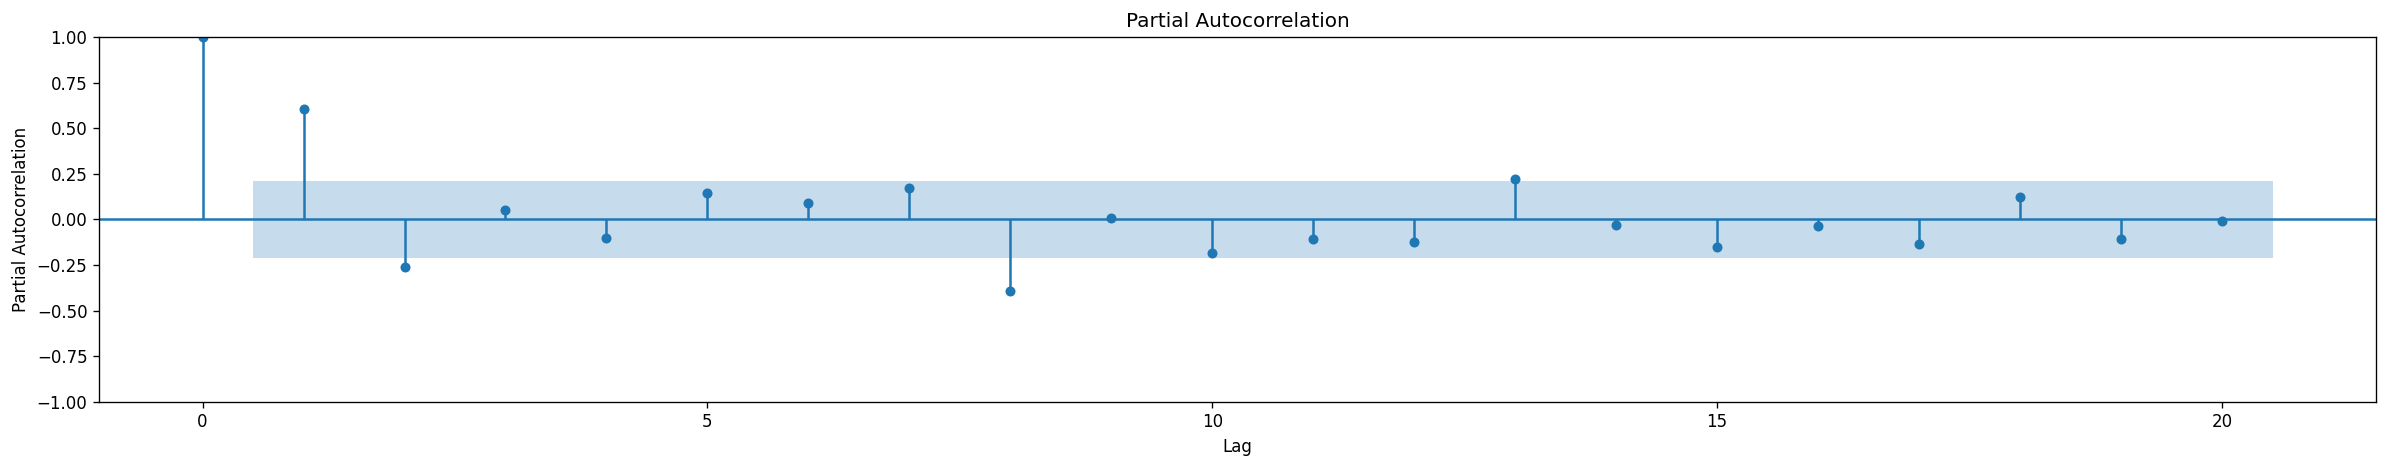

adjusted_pr


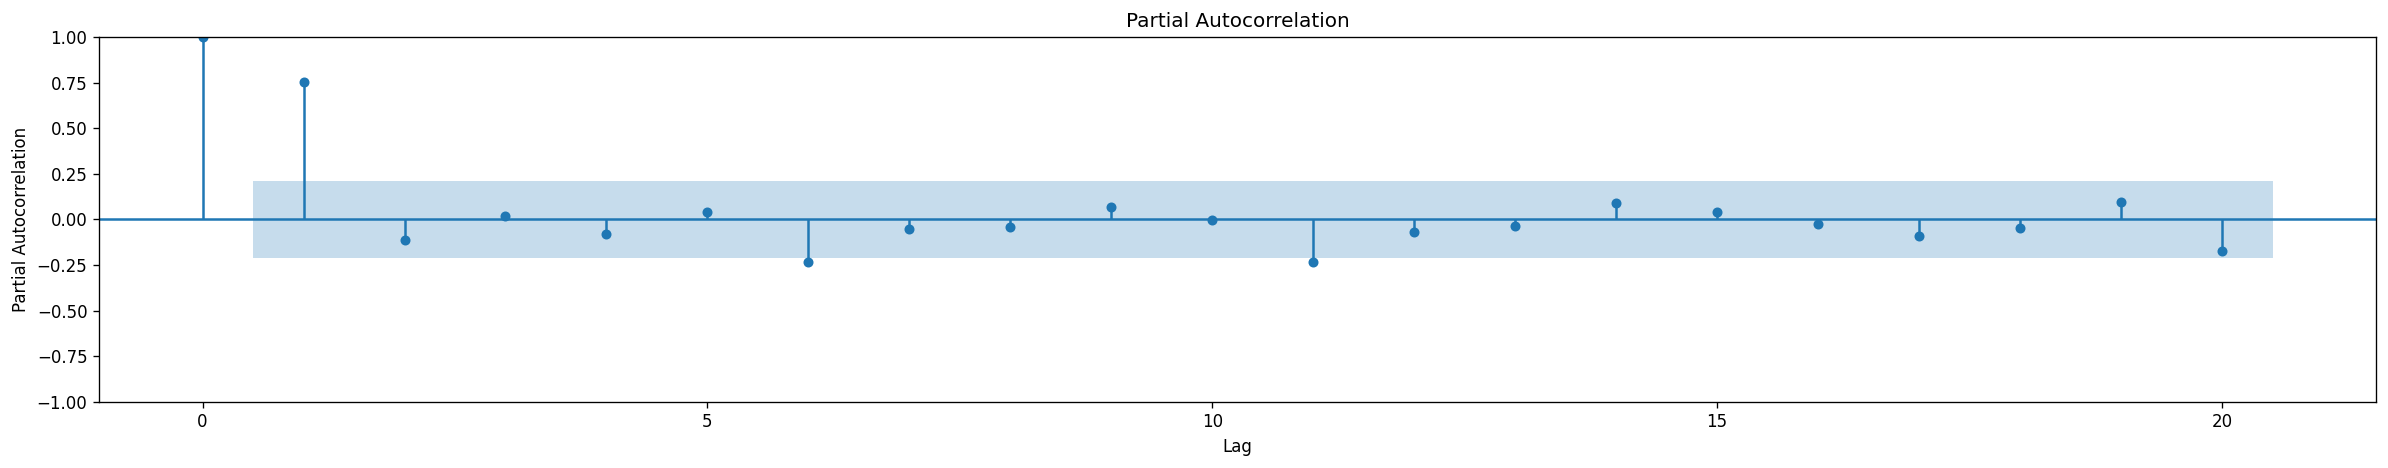

In [131]:
columns = ['WEEK', 'DOW INDICATOR1', 'DEMAND', ' TUESDAY BOOKINGS',
       ' PICKUP RATIO', 'DOW INDEX', 'turn_down_numbers','adjusted_pr']
for column in columns:
    print(column)
    pacf_analysis(data1[f'{column}'])

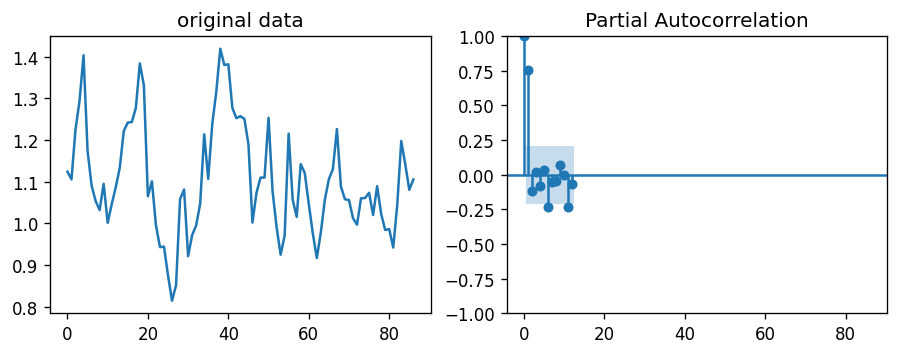

In [132]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data1['adjusted_pr']); axes[0].set_title('original data')
axes[1].set(ylim=(0,5))
plot_pacf(data1['adjusted_pr'], lags=12, ax=axes[1])

plt.show()

In [133]:
columns = ['WEEK', 'DOW INDICATOR1', 'DEMAND', ' TUESDAY BOOKINGS',
       ' PICKUP RATIO', 'DOW INDEX', 'turn_down_numbers','adjusted_pr']
for column in columns:
    acf, q, pval = smt.acf(data1[f'{column}'], nlags = 12, qstat = True)
    pacf = smt.pacf(data1[f'{column}'], nlags=12)

    correlogram = pd.DataFrame({'acf': acf[1:],
                           'pacf': pacf[1:],
                           'Q':q,
                           'p-val': pval})

    print(column)
    print(correlogram)

WEEK
    acf  pacf   Q  p-val
0   NaN   NaN NaN    NaN
1   NaN   NaN NaN    NaN
2   NaN   NaN NaN    NaN
3   NaN   NaN NaN    NaN
4   NaN   NaN NaN    NaN
5   NaN   NaN NaN    NaN
6   NaN   NaN NaN    NaN
7   NaN   NaN NaN    NaN
8   NaN   NaN NaN    NaN
9   NaN   NaN NaN    NaN
10  NaN   NaN NaN    NaN
11  NaN   NaN NaN    NaN
DOW INDICATOR1
         acf       pacf           Q         p-val
0   0.262760   0.265815    6.216268  1.265817e-02
1  -0.231335  -0.330811   11.091256  3.904490e-03
2  -0.479425  -0.392505   32.278375  4.572089e-07
3  -0.480031  -0.475772   53.774950  5.865799e-11
4  -0.248934  -0.604314   59.626390  1.451886e-11
5   0.216726  -0.687958   64.116406  6.534690e-12
6   0.919810   1.006734  146.003525  2.801661e-28
7   0.242641  12.598711  151.773996  8.362288e-29
8  -0.211407  -1.078876  156.210617  4.546513e-29
9  -0.439473  -0.750088  175.632142  1.888231e-32
10 -0.440079  -0.974514  195.363466  6.806566e-36
11 -0.229005 -35.567452  200.777723  2.253576e-36
DEMAN

In [134]:
columns = ['adjusted_pr', ' PICKUP RATIO']
for column in columns: 
    res1 = smt.arma_order_select_ic(data1[f'{column}'], 
    max_ar = 5, max_ma=5, ic=['aic','bic'])
    print('AIC')
    print(res1.aic_min_order)
    print('SBIC')
    print(res1.bic_min_order)
    print('\n')

/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wangmeiyi/anaconda3/lib/python3.10/site-p

AIC
(1, 0)
SBIC
(1, 0)




/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wangmeiyi/anaconda3/lib/python3.10/site-p

AIC
(2, 4)
SBIC
(2, 0)




/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [252]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(data1['adjusted_pr'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.444425
p-value: 0.009534


In [258]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(data1[' PICKUP RATIO'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.295667
p-value: 0.015073


In [121]:
res = smt.ARIMA(data1['adjusted_pr'], order = (1, 0, 0)).fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:            adjusted_pr   No. Observations:                   87
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  90.187
Date:                Wed, 18 Oct 2023   AIC                           -174.374
Time:                        17:38:20   BIC                           -166.977
Sample:                             0   HQIC                          -171.396
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1046      0.037     29.923      0.000       1.032       1.177
ar.L1          0.7445      0.067     11.153      0.000       0.614       0.875
sigma2         0.0073      0.001      5.748      0.0

In [286]:
forecast1 = res.predict()

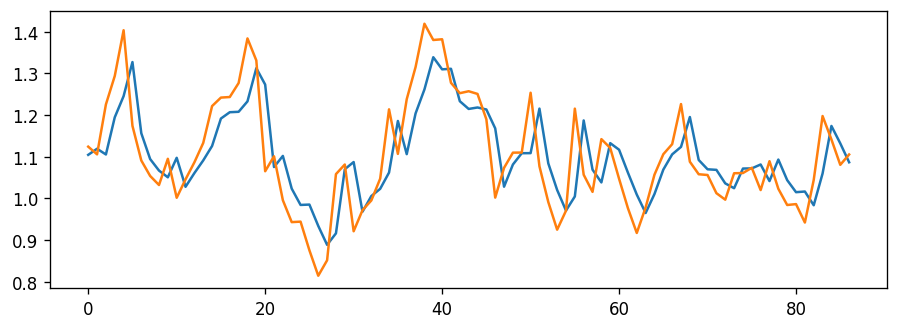

In [122]:
plt.plot(res.predict())
plt.plot(data1['adjusted_pr'])

In [104]:
res.forecast(30)

87     1.105262
88     1.105104
89     1.104985
90     1.104897
91     1.104832
92     1.104783
93     1.104747
94     1.104720
95     1.104700
96     1.104685
97     1.104673
98     1.104665
99     1.104659
100    1.104654
101    1.104651
102    1.104648
103    1.104646
104    1.104645
105    1.104644
106    1.104643
107    1.104643
108    1.104642
109    1.104642
110    1.104642
111    1.104641
112    1.104641
113    1.104641
114    1.104641
115    1.104641
116    1.104641
Name: predicted_mean, dtype: float64

In [257]:
a = 1.104832*0.865
print(a)

0.95567968


In [287]:
res = smt.ARIMA(data1[' PICKUP RATIO'], order = (2, 0, 0)).fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:           PICKUP RATIO   No. Observations:                   87
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  65.300
Date:                Thu, 19 Oct 2023   AIC                           -122.600
Time:                        08:14:05   BIC                           -112.737
Sample:                    05-23-1987   HQIC                          -118.629
                         - 08-17-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0999      0.032     34.875      0.000       1.038       1.162
ar.L1          0.8707      0.100      8.720      0.000       0.675       1.066
ar.L2         -0.3141      0.114     -2.766      0.0

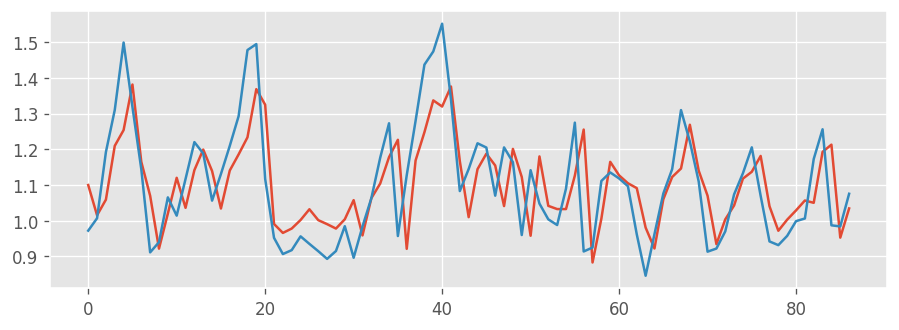

In [256]:
plt.plot(res.predict())
plt.plot(data1[' PICKUP RATIO'])

In [288]:
forecast2 = res.predict()

In [137]:
res.forecast(6)

87    1.115060
88    1.120785
89    1.113343
90    1.105064
91    1.100193
92    1.098553
Name: predicted_mean, dtype: float64

In [138]:
b = 1.098554*0.865

In [139]:
b

0.9502492100000001

In [140]:
accuracy = 1-(a-b)/b

In [141]:
accuracy

0.9943625893674778

# #SARIMA MODEL

Now let's use another model to test the data, namely SARIMA model
* SARIMA model is an extentional utilization of ARIMA model but it reinforce the analysis of seasonal factor. Since the data we are dealing with this time also has a weekly seasonality characterstic, we can use SARIMA model to retest it. 

In [148]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
%matplotlib inline
import itertools
import warnings
plt.style.use('ggplot')

In [272]:
data1.index = pd.to_datetime(data1.index)

In [278]:
data1.head


<bound method NDFrame.head of            WEEK DOW INDICATOR1  DEMAND   TUESDAY BOOKINGS   PICKUP RATIO  \
1987-05-23    1              1  1470.0             1512.0       0.972222   
1987-05-24  NaN              2   870.0              864.0       1.006944   
1987-05-25  NaN              3   986.0              827.0       1.192261   
1987-05-26  NaN              4  1247.0              952.0       1.309874   
1987-05-27  NaN              5  1109.0              740.0       1.498649   
...         ...            ...     ...                ...            ...   
1987-08-13  NaN              6  1093.0              932.0       1.172747   
1987-08-14  NaN              7  1217.0              969.0       1.255934   
1987-08-15   13              1  1542.0             1562.0       0.987196   
1987-08-16  NaN              2   988.0             1004.0       0.984064   
1987-08-17  NaN              3  1510.0             1404.0       1.075499   

            DOW INDEX  turn_down_numbers  adjusted_pr  
1

In [273]:
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

y = data1[' PICKUP RATIO']

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09100D-01    |proj g|=  8.25606D-01

At iterate    5    f= -1.15843D-01    |proj g|=  1.05842D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      9      1     0     0   1.058D-06  -1.158D-01
  F = -0.11584278167525565   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.25393D+01    |proj g|=  3.73440D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     24      1     0     0   3.887D-07   1.254D+01
  F =   12.539273240066265     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:2187.83354377153
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36441D-01    |proj g|=  2.44723D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-52.74602533199443
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72584D+01    |proj g|=  2.68317D+00
  ys=-1.085E+03  -gs= 5.617E-01 BFGS update SKIPPED


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     29      2     1     0   5.187D+03   1.297D+01
  F =   12.971668201712916     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:2265.070267098047
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47305D-01    |proj g|=  3.61956D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.



At iterate    5    f= -3.35509D-01    |proj g|=  6.58059D-01

At iterate   10    f= -3.57876D-01    |proj g|=  1.06354D-01

At iterate   15    f= -3.62084D-01    |proj g|=  1.02909D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -3.62089D-01    |proj g|=  2.36027D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     52      2     0     0   2.360D-04  -3.621D-01
  F = -0.36208865445614308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:-53.0034258753689
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.38890D-01    |proj g|=  1.47829D-01

At iterate    5    f= -1.45845D-01    |proj g|=  9.09757D-04

           * *

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     70      2     1     0   5.292D+03   1.226D+01
  F =   12.256276669905464     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:2140.592140563551
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.21640D-01    |proj g|=  1.10818D+00

At iterate    5    f= -2.45749D-01    |proj g|=  1.25808D-02

At iterate   10    f= -2.45913D-01    |proj g|=  1.06378D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -3.31225D-01    |proj g|=  3.59977D-03

At iterate   20    f= -3.31228D-01    |proj g|=  4.09369D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   1.669D-04  -3.312D-01
  F = -0.33122858516311077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-49.63377381838127
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69035D+01    |proj g|=  2.64658D+00


 This problem is unconstrained.


  ys=-2.187E+01  -gs= 5.384E-01 BFGS update SKIPPED
  ys=-2.238E-21  -gs= 2.743E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     83      2     2     0   1.555D+04   1.096D+01
  F =   10.955159069195298     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:1916.197678039982
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53449D-01    |proj g|=  1.61083D+00

At iterate    5    f= -3.42160D-01    |proj g|=  2.48969D-01

At iterate   10    f= -3.48113D-01    |proj g|=  3.89154D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f= -3.59714D-01    |proj g|=  2.83414D-01

At iterate   15    f= -3.63809D-01    |proj g|=  6.48444D-03

At iterate   20    f= -3.63911D-01    |proj g|=  6.79397D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     37      1     0     0   4.520D-05  -3.639D-01
  F = -0.36391114495188370     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:-53.32053922162777
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f= -3.11189D-01    |proj g|=  3.66919D-01

At iterate   10    f= -3.39888D-01    |proj g|=  1.18863D-01

At iterate   15    f= -3.55558D-01    |proj g|=  5.32615D-01

At iterate   20    f= -3.65255D-01    |proj g|=  4.84061D-01

At iterate   25    f= -3.72427D-01    |proj g|=  4.51925D-02

At iterate   30    f= -3.73050D-01    |proj g|=  4.65105D-02

At iterate   35    f= -3.73132D-01    |proj g|=  7.25709D-03

At iterate   40    f= -3.73133D-01    |proj g|=  2.11950D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     52      1     0     0   3.806D-05  -3.731D-01
  F = -0.373132963532

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -3.63765D-01    |proj g|=  3.46533D-01

At iterate   10    f= -3.67906D-01    |proj g|=  1.59454D-02

At iterate   15    f= -3.67935D-01    |proj g|=  3.63956D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     27      1     0     0   2.670D-05  -3.679D-01
  F = -0.36794979692017926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:-56.023264664111196
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     73      3     1     0   8.118D+03   1.199D+01
  F =   11.985351975561926     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:2095.451243747775
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73969D-01    |proj g|=  8.20070D-01

At iterate    5    f= -2.89698D-01    |proj g|=  2.61279D-01

At iterate   10    f= -2.93016D-01    |proj g|=  1.69807D-01

At iterate   1

 This problem is unconstrained.


  ys=-3.202E+01  -gs= 5.314E-01 BFGS update SKIPPED
  ys=-1.199E-18  -gs= 8.544E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     87      3     2     0   4.717D+03   1.078D+01
  F =   10.784436434364512     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1888.491939579425
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.04479D-01    |proj g|=  1.58343D+00

At iterate    5    f= -3.80272D-01    |proj g|=  5.47239D-01

At iterate   10    f= -3.89996D-01    |proj g|=  2.25082D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f= -3.81404D-01    |proj g|=  5.91071D-01

At iterate   10    f= -4.00830D-01    |proj g|=  2.07211D-02

At iterate   15    f= -4.01328D-01    |proj g|=  3.80044D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     25      1     0     0   5.739D-05  -4.014D-01
  F = -0.40135380746048011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:-57.83556249812354
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f= -3.74893D-01    |proj g|=  8.57782D-02

At iterate   15    f= -3.75470D-01    |proj g|=  5.28186D-02

At iterate   20    f= -3.75518D-01    |proj g|=  6.83656D-04

At iterate   25    f= -3.75520D-01    |proj g|=  2.70557D-03

At iterate   30    f= -3.75581D-01    |proj g|=  8.33946D-02

At iterate   35    f= -3.75919D-01    |proj g|=  6.73094D-02

At iterate   40    f= -3.77800D-01    |proj g|=  6.18544D-02

At iterate   45    f= -3.78166D-01    |proj g|=  2.72365D-02


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f= -3.78231D-01    |proj g|=  8.92829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68      1     0     0   8.928D-03  -3.782D-01
  F = -0.37823079380090208     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:-51.81215812135696
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25183D-01    |proj g|=  1.92568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.



At iterate    5    f=  1.25393D+01    |proj g|=  6.44285D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     33      1     1     0   6.443D-07   1.254D+01
  F =   12.539273240067541     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:2189.833543771752
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.11285D-01    |proj g|=  1.02374D+00

At iterate    5    f= -2.31854D-01    |proj g|=  1.81566D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     34      1     0     0   4.766D-05  -3.394D-01
  F = -0.33935695336427174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-51.04810988538328
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72557D+01    |proj g|=  2.70082D+00
  ys=-1.194E+02  -gs= 5.605E-01 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     74      2     1     0   1.844D+05   9.795D+00
  F =   9.7947207831692236     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:1714.2814162714449
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48797D-01    |proj g|=  1.58104D+00

At iterate    5    f= -3.36385D-01    |proj g|=  3.57440D-01

At iterate   10    f= -3.41292D-01    |proj g|=  1.56449D-01


 This problem is unconstrained.



At iterate   15    f= -3.41651D-01    |proj g|=  1.68471D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     25      1     0     0   4.137D-05  -3.417D-01
  F = -0.34165103406600528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:-51.447279927484914
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48907D-01    |proj g|=  1.58223D+00

At iterate    5    f= -3.45548D-01    |proj g|=  5.46932D-01


 This problem is unconstrained.



At iterate   10    f= -3.52289D-01    |proj g|=  1.89004D-01

At iterate   15    f= -3.55188D-01    |proj g|=  8.82315D-03

At iterate   20    f= -3.55304D-01    |proj g|=  9.38827D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     34      1     0     0   1.169D-04  -3.553D-01
  F = -0.35530393592915177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:-51.82288485167241
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   15    f= -3.71673D-01    |proj g|=  7.54440D-02

At iterate   20    f= -3.72837D-01    |proj g|=  1.52452D-02

At iterate   25    f= -3.72931D-01    |proj g|=  5.67548D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   30    f= -3.72934D-01    |proj g|=  6.98932D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     61      2     0     0   3.061D-04  -3.729D-01
  F = -0.37293436123302892     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:-52.89057885454703
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.42462D-01    |proj g|=  1.77602D-01

At iterate    5    f= -1.49944D-01    |proj g|=  8.87848D-02

At iterate   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     72      2     0     0   1.555D-04  -3.425D-01
  F = -0.34252114974238385     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-51.59868005517479
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81522D+01    |proj g|=  2.64857D+00
  ys=-7.368E+01  -gs= 5.476E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     75      2     1     0   3.652D+05   9.013D+00
  F =   9.0130530703664657     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:1578.271234243765
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.15865D-01    |proj g|=  1.06426D+00

At iterate    5    f= -2.38311D-01    |proj g|=  2.08466D-02

At iterate   10    f= -2.39332D-01    |proj g|=  4.54426D-02

At iterate   1

 This problem is unconstrained.


  ys=-1.128E+01  -gs= 5.236E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     67      2     1     0   1.467D+05   9.918D+00
  F =   9.9178137081067685     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:1737.6995852105779
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49497D-01    |proj g|=  1.58551D+00

At iterate    5    f= -3.40040D-01    |proj g|=  1.48280D-01

At iterate   10    f= -3.41220D-01    |proj g|=  1.93577D-02

At iterate   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49801D-01    |proj g|=  1.58853D+00

At iterate    5    f= -3.40610D-01    |proj g|=  5.51508D-01

At iterate   10    f= -3.51629D-01    |proj g|=  1.19763D-01

At iterate   15    f= -3.53918D-01    |proj g|=  2.22008D-02

At iterate   20    f= -3.54101D-01    |proj g|=  1.61269D-02
  ys=-2.781E-03  -gs= 5.541E-03 BFGS update SKIPPED

At iterate   25    f= -3.81548D-01    |proj g|=  2.13596D-01

At iterate   30    f= -3.87963D-01    |proj g|=  1.28250D-02

At iterate   35    f= -3.87980D-01    |proj g|=  5.86744D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.



At iterate   15    f= -3.55390D-01    |proj g|=  5.71367D-01

At iterate   20    f= -3.62836D-01    |proj g|=  4.54422D-02

At iterate   25    f= -3.74025D-01    |proj g|=  6.06607D-01

At iterate   30    f= -3.81877D-01    |proj g|=  5.11538D-02

At iterate   35    f= -3.82922D-01    |proj g|=  4.79544D-02

At iterate   40    f= -3.83453D-01    |proj g|=  4.50447D-01

At iterate   45    f= -3.85597D-01    |proj g|=  1.23904D-01

At iterate   50    f= -3.85791D-01    |proj g|=  2.57142D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   2.571D-02  -3.858D-01
  F = -0.385790941130

/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.38521D-01    |proj g|=  2.47048D-02

At iterate   10    f= -2.39263D-01    |proj g|=  1.44713D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   9.495D-05  -2.393D-01
  F = -0.23926336007418533     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:-33.63182465290825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.15583D-01    |proj g|=  1.86347D+00

At iterate   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     52      2     0     0   1.924D-04  -3.909D-01
  F = -0.39090658828649566     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:-58.01774636185024
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76907D+01    |proj g|=  3.02600D+00
  ys=-9.205E+02  -gs= 5.399E-01 BFGS update SKIPPED


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     28      2     1     0   5.162D+03   1.364D+01
  F =   13.644394663102496     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:2386.124671379834
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.92000D-01    |proj g|=  9.67532D-01

At iterate    5    f= -3.12552D-01    |proj g|=  1.13404D-01

At iterate   10    f= -3.13627D-01    |proj g|=  5.94875D-02

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -3.89822D-01    |proj g|=  1.59872D-04

At iterate   25    f= -3.89822D-01    |proj g|=  3.05828D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     36      1     0     0   4.314D-04  -3.898D-01
  F = -0.38982208823091713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:-55.82904335217958
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64677D+01    |proj g|=  3.02611D+00


 This problem is unconstrained.


  ys=-6.902E+03  -gs= 5.402E-01 BFGS update SKIPPED


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     28      2     1     0   3.867D+04   1.115D+01
  F =   11.154057605041151     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:1954.8060232771602
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.06581D-01    |proj g|=  1.59864D+00

At iterate    5    f= -3.89510D-01    |proj g|=  4.74344D-01

At iterate   10    f= -3.94287D-01    |proj g|=  5.98693D-02

At iterate   

 This problem is unconstrained.



At iterate   10    f= -3.97031D-01    |proj g|=  2.03666D-01

At iterate   15    f= -3.99975D-01    |proj g|=  9.96858D-02

At iterate   20    f= -4.00673D-01    |proj g|=  1.63518D-02

At iterate   25    f= -4.00734D-01    |proj g|=  6.57694D-03

At iterate   30    f= -4.00758D-01    |proj g|=  3.75324D-03

At iterate   35    f= -4.00827D-01    |proj g|=  2.17097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     50      1     0     0   6.905D-04  -4.008D-01
  F = -0.40083122787198394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:-55.7446336497

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1      7      1     0     0   1.068D+00  -2.548D-01
  F = -0.25481397121726129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:-28.337630991803465
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.90311D-01    |proj g|=  2.53738D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo

 This problem is unconstrained.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -3.54385D-01    |proj g|=  1.63311D-02

At iterate   15    f= -3.54867D-01    |proj g|=  1.05362D-01

At iterate   20    f= -3.54965D-01    |proj g|=  5.73243D-03

At iterate   25    f= -3.54969D-01    |proj g|=  1.08716D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     35      1     0     0   1.087D-04  -3.550D-01
  F = -0.35496927894916391     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:-53.76465453715452
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     74      3     2     0   1.516D+05   1.138D+01
  F =   11.376566839748987     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:1989.5226301163239
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.37722D-01    |proj g|=  8.23265D-01

At iterate    5    f= -2.51177D-01    |proj g|=  1.69217D-01

At iterate   10    f= -2.51684D-01    |proj g|=  3.32147D-02

At iterate   

 This problem is unconstrained.


  ys=-3.337E-16  -gs= 1.471E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     80      3     2     0   1.752D+04   1.117D+01
  F =   11.173941711588828     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:1956.2658578164562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66864D-01    |proj g|=  1.45629D+00

At iterate    5    f= -3.36887D-01    |proj g|=  7.05756D-01

At iterate   10    f= -3.47578D-01    |proj g|=  1.95596D-01

At iterate   

 This problem is unconstrained.



At iterate   10    f= -3.62031D-01    |proj g|=  1.15964D-01

At iterate   15    f= -3.66027D-01    |proj g|=  4.19820D-02

At iterate   20    f= -3.66125D-01    |proj g|=  2.17208D-02

At iterate   25    f= -3.66137D-01    |proj g|=  1.14785D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     33      1     0     0   1.148D-04  -3.661D-01
  F = -0.36613698488148605     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:-51.70783536937857
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X

 This problem is unconstrained.



At iterate   10    f= -3.57460D-01    |proj g|=  2.51852D-01

At iterate   15    f= -3.67484D-01    |proj g|=  5.45881D-02

At iterate   20    f= -3.77113D-01    |proj g|=  1.20072D-01

At iterate   25    f= -3.78039D-01    |proj g|=  2.26928D-02

At iterate   30    f= -3.78459D-01    |proj g|=  8.36202D-02

At iterate   35    f= -3.78577D-01    |proj g|=  1.41582D-03

At iterate   40    f= -3.78581D-01    |proj g|=  2.89297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     64      1     0     0   8.547D-05  -3.786D-01
  F = -0.37858065108267330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -3.49303D-01    |proj g|=  4.59086D-01

At iterate   10    f= -3.54799D-01    |proj g|=  2.66733D-01

At iterate   15    f= -3.70300D-01    |proj g|=  8.30414D-01

At iterate   20    f= -3.87222D-01    |proj g|=  5.82218D-02

At iterate   25    f= -3.94785D-01    |proj g|=  4.16533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     39      1     0     0   1.611D-04  -3.948D-01
  F = -0.39478520169001374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:-58.69262509406239
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.


  ys=-2.657E+01  -gs= 5.407E-01 BFGS update SKIPPED
  ys=-5.799E+01  -gs= 5.465E-01 BFGS update SKIPPED


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     43      3     2     0   1.534D+04   1.329D+01
  F =   13.293355877390644     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:2325.043922665972
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.41773D-01    |proj g|=  8.92552D-01

At iterate    5    f= -2.59147D-01    |proj g|=  2.02951D-01

At iterate   10    f= -2.68202D-01    |proj g|=  4.91873D-01

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -3.89282D-01    |proj g|=  1.30423D-01

At iterate   25    f= -3.93188D-01    |proj g|=  3.76769D-01

At iterate   30    f= -3.98435D-01    |proj g|=  1.90860D-01

At iterate   35    f= -3.99480D-01    |proj g|=  8.89557D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     48      1     0     0   5.026D-04  -3.995D-01
  F = -0.39947999114389871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:-57.509518459038375
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At 

 This problem is unconstrained.


  ys=-2.612E+01  -gs= 5.390E-01 BFGS update SKIPPED
  ys=-3.115E+02  -gs= 5.506E-01 BFGS update SKIPPED


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     43      3     2     0   7.986D+04   1.076D+01
  F =   10.764085111163380     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:1886.950809342428
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67467D-01    |proj g|=  1.48074D+00

At iterate    5    f= -3.45300D-01    |proj g|=  6.09946D-01

At iterate   10    f= -3.54109D-01    |proj g|=  7.03418D-02

At iterate   1

 This problem is unconstrained.



At iterate    5    f= -3.45920D-01    |proj g|=  7.93021D-01

At iterate   10    f= -3.60096D-01    |proj g|=  3.27872D-01

At iterate   15    f= -3.70724D-01    |proj g|=  1.22819D-01

At iterate   20    f= -3.75593D-01    |proj g|=  6.09072D-02

At iterate   25    f= -3.88817D-01    |proj g|=  7.82329D-02

At iterate   30    f= -3.93939D-01    |proj g|=  1.17829D-02

At iterate   35    f= -3.94001D-01    |proj g|=  1.12297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     45      1     0     0   1.648D-04  -3.940D-01
  F = -0.39400111888192674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -3.27627D-01    |proj g|=  6.69046D-01

At iterate   10    f= -3.60534D-01    |proj g|=  4.65955D-01

At iterate   15    f= -3.74059D-01    |proj g|=  2.89326D-01

At iterate   20    f= -3.82956D-01    |proj g|=  1.39801D-02

At iterate   25    f= -3.83863D-01    |proj g|=  1.37349D-02

At iterate   30    f= -3.84412D-01    |proj g|=  2.57340D-02

At iterate   35    f= -3.85139D-01    |proj g|=  8.52080D-02

At iterate   40    f= -3.85331D-01    |proj g|=  5.41899D-03

At iterate   45    f= -3.85366D-01    |proj g|=  7.46302D-02

At iterate   50    f= -3.85883D-01    |proj g|=  1.12053D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:-51.143686277463246
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.30706D-01    |proj g|=  1.48588D-01

At iterate    5    f= -2.39301D-01    |proj g|=  2.75025D-02

At iterate   10    f= -2.39341D-01    |proj g|=  2.46797D-02

At iterate   15    f= -2.39422D-01    |proj g|=  4.08820D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   9.704D-05  -2.394D-01
  F = -0.23942264974307476     

CONVERGENCE:

 This problem is unconstrained.


  ys=-1.743E+01  -gs= 5.195E-01 BFGS update SKIPPED


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     48      3     2     0   1.127D+05   1.135D+01
  F =   11.346398364802962     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:1988.2733154757152
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.84193D-01    |proj g|=  8.89273D-01

At iterate    5    f= -3.03388D-01    |proj g|=  1.79113D-01

At iterate   10    f= -3.04815D-01    |proj g|=  2.17308D-02

At iterate   

 This problem is unconstrained.



At iterate   10    f= -3.86124D-01    |proj g|=  5.49014D-02

At iterate   15    f= -3.89927D-01    |proj g|=  3.15643D-02

At iterate   20    f= -3.91409D-01    |proj g|=  7.04058D-02

At iterate   25    f= -3.92652D-01    |proj g|=  1.48024D-02

At iterate   30    f= -3.92762D-01    |proj g|=  9.30641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     45      1     0     0   7.344D-05  -3.928D-01
  F = -0.39276250409444841     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:-54.34067571243402
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.


  ys=-2.301E+01  -gs= 5.238E-01 BFGS update SKIPPED


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     48      3     2     0   1.218D+05   1.002D+01
  F =   10.017725626897917     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:1759.0842590802376
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.00513D-01    |proj g|=  1.54018D+00

At iterate    5    f= -3.82587D-01    |proj g|=  2.27108D-01

At iterate   10    f= -3.85966D-01    |proj g|=  9.37629D-03

At iterate   

 This problem is unconstrained.



At iterate   10    f= -3.89129D-01    |proj g|=  1.72973D-01

At iterate   15    f= -3.91946D-01    |proj g|=  2.06410D-02

At iterate   20    f= -3.92545D-01    |proj g|=  1.21859D-03

At iterate   25    f= -3.92549D-01    |proj g|=  6.17570D-04

At iterate   30    f= -3.92919D-01    |proj g|=  3.88123D-02

At iterate   35    f= -3.93849D-01    |proj g|=  1.35060D-02

At iterate   40    f= -3.93987D-01    |proj g|=  2.50674D-02

At iterate   45    f= -3.94251D-01    |proj g|=  4.82235D-02

At iterate   50    f= -3.94279D-01    |proj g|=  3.73414D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     69   

/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:-52.604548171007906
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56279D-01    |proj g|=  1.07600D+00

At iterate    5    f= -3.59470D-01    |proj g|=  1.60722D-01

At iterate   10    f= -3.79443D-01    |proj g|=  2.32689D-02

At iterate   15    f= -3.79668D-01    |proj g|=  2.47394D-02

At iterate   20    f= -3.79979D-01    |proj g|=  1.85840D-02

At iterate   25    f= -3.82676D-01    |proj g|=  2.35138D-02

At iterate   30    f= -3.84730D-01    |proj g|=  1.05922D-01

At iterate   35    f= -3.86818D-01    |proj g|=  5.07956D-02

At iterate   40    f= -3.87084D-01    |proj g|=  6.20388D-03

At iterate   45    f= -3.87827D-01    |proj g|=  8.29945D-02

At iterate   50    f= -3.88101D-01    |proj g|=  2.18295D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluat

/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [259]:
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

y = data1[' PICKUP RATIO']

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 7)
SARIMAX: (0, 1, 1) x (0, 1, 2, 7)
SARIMAX: (0, 1, 2) x (1, 1, 0, 7)
SARIMAX: (0, 1, 2) x (1, 1, 1, 7)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58033D-01    |proj g|=  7.53874D-01

At iterate    5    f= -4.60805D-01    |proj g|=  2.13170D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      8      1     0     0   2.132D-05  -4.608D-01
  F = -0.46080496670745019     



 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -5.93920D-01    |proj g|=  2.92978D-01

At iterate   10    f= -6.02465D-01    |proj g|=  2.19717D-01

At iterate   15    f= -6.08687D-01    |proj g|=  8.32650D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   1.415D-04  -6.087D-01
  F = -0.60872172070990493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(0, 1, 2, 7)12 - AIC:-99.91757940352346
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 1, 2, 7)12 - AIC:-98.7624930789944
ARIMA(0, 1, 0)x(2, 1, 0, 7)12 - AIC:-93.0957436988226
ARIMA(0, 1, 0)x(2, 1, 1, 7)12 - AIC:-91.308689997318

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      7      1     0     0   4.405D-04  -5.392D-01
  F = -0.53919110663613312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.02179D-01    |proj g|=  6.75578D-01

At iterate    5    f= -6.41908D-

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -6.05993D-01    |proj g|=  3.28322D-01

At iterate   20    f= -6.08336D-01    |proj g|=  1.22903D-01

At iterate   25    f= -6.10046D-01    |proj g|=  9.02916D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     38      1     0     0   1.869D-04  -6.101D-01
  F = -0.61009827771695124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(2, 1, 2, 7)12 - AIC:-96.15710032274951
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -5.95000D-01    |proj g|=  3.23771D-01

At iterate   15    f= -6.01448D-01    |proj g|=  2.28610D-02

At iterate   20    f= -6.02284D-01    |proj g|=  1.73819D-01

At iterate   25    f= -6.02617D-01    |proj g|=  7.08119D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     35      1     0     0   9.717D-05  -6.026D-01
  F = -0.60261688103118760     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 1, 2, 7)12 - AIC:-96.85533729942664
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -6.36417D-01    |proj g|=  4.98376D-01

At iterate   15    f= -6.43486D-01    |proj g|=  2.22549D-03

At iterate   20    f= -6.43490D-01    |proj g|=  1.20234D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   5.309D-04  -6.435D-01
  F = -0.64349068883191929     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 1, 7)12 - AIC:-103.96737985675395
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -5.71917D-01    |proj g|=  2.81313D-03

At iterate   20    f= -5.71937D-01    |proj g|=  2.34772D-02

At iterate   25    f= -5.82492D-01    |proj g|=  3.29482D-02

At iterate   30    f= -5.84110D-01    |proj g|=  3.63917D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     70      2     0     0   2.339D-05  -5.841D-01
  F = -0.58411085069068513     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(2, 1, 1, 7)12 - AIC:-91.63528802017922
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f= -5.68832D-01    |proj g|=  6.32407D-01

At iterate   10    f= -5.99060D-01    |proj g|=  9.44198D-02

At iterate   15    f= -6.05667D-01    |proj g|=  4.27550D-01

At iterate   20    f= -6.08342D-01    |proj g|=  4.36794D-01

At iterate   25    f= -6.13629D-01    |proj g|=  1.39898D-02

At iterate   30    f= -6.14419D-01    |proj g|=  1.27679D-01

At iterate   35    f= -6.14768D-01    |proj g|=  5.21976D-02

At iterate   40    f= -6.14802D-01    |proj g|=  2.64674D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     92      2     0     0   1.333D-04  -6.148D-01
  F = -0.61480231639983984     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(2, 1, 2, 7)12 - AIC:-94.97560305357213
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.65054D-01    |proj g|=  4.58474D-02

At iterate    5    f= -4.66380D-01    |proj g|=  9.76939D-03

At iterate   10    f= -4.66412D-01    |proj g|=  2.15283D-05

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.09774D-01    |proj g|=  7.14105D-01

At iterate   10    f= -6.50586D-01    |proj g|=  2.40034D-01

At iterate   15    f= -6.54144D-01    |proj g|=  1.03357D-01

At iterate   20    f= -6.54235D-01    |proj g|=  6.33456D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     31      1     0     0   8.583D-05  -6.542D-01
  F = -0.65423585311483234     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 2)x(1, 1, 1, 7)12 - AIC:-103.83703844198084
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 2)x(2, 1, 0, 7)12 - AIC:-94.47641198992416
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42595D-01    |proj g|=  2.05401D+00

At iterate    5    f= -5.87479D-01    |proj g|=  7.06063D-01

At iterate   10    f= -5.98329D-01    |proj g|=  2.32620D-01

At iterate   15    f= -5.98969D-01    |proj g|=  9.18749D-03

At iterate   20    f= -5.99817D-01    |proj g|=  7.90702D-02

At iterate   25    f= -6.00457D-01    |proj g|=  1.05021D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.



At iterate    5    f= -5.95135D-01    |proj g|=  6.01600D-01

At iterate   10    f= -6.25181D-01    |proj g|=  2.71601D-01

At iterate   15    f= -6.27170D-01    |proj g|=  8.03152D-02

At iterate   20    f= -6.27257D-01    |proj g|=  8.26851D-03

At iterate   25    f= -6.27260D-01    |proj g|=  2.85199D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     43      1     0     0   3.701D-04  -6.273D-01
  F = -0.62726044131326686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 2)x(2, 1, 2, 7)12 - AIC:-95.14331678850843


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.63108D-01    |proj g|=  4.41309D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     10      1     0     0   4.430D-04  -4.631D-01
  F = -0.46310805944626915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 0, 7)12 - AIC:-76.58080234365083
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -5.56122D-01    |proj g|=  3.70740D-01

At iterate   10    f= -5.59520D-01    |proj g|=  5.97964D-03

At iterate   15    f= -5.59552D-01    |proj g|=  1.52485D-02

At iterate   20    f= -5.59553D-01    |proj g|=  1.70755D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     29      1     0     0   1.304D-04  -5.596D-01
  F = -0.55955271310866328     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(2, 1, 0, 7)12 - AIC:-89.36217208090741
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(2, 1, 1, 7)12 - AIC:-89.93522180400001
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.24764D-01    |proj g|=  2.21019D+00

At iterate    5    f= -5.78314D-01    |proj g|=  6.72571D-01

At iterate   10    f= -6.01791D-01    |proj g|=  2.17990D-01

At iterate   15    f= -6.10269D-01    |proj g|=  6.45892D-02

At iterate   20    f= -6.12678D-01    |proj g|=  1.30195D-01

At iterate   25    f= -6.13500D-01    |proj g|=  3.16536D-01

At iterate   30    f= -6.14992D-01    |proj g|=  5.60824D-02

At iterate   35    f= -6.15469D-01    |proj g|=  1.02876D-01

At iterate   40    f= -6.15594D-01    |proj g|=  1.03256D-03

At iterate   45    f= -6.15595D-01    |proj g|=  4.19975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sea

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     54      1     0     0   5.739D-04  -6.672D-01
  F = -0.66718788162330922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 7)12 - AIC:-108.0906914024558
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.96915D-01    |proj g|=  2.61792D+00

At iterate    5    f= -5.90041D-01    |proj g|=  7.05788D-02

At iterate   10    f= -6.03255D-01    |proj g|=  4.92049D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -5.25488D-01    |proj g|=  1.64835D-01

At iterate   10    f= -5.26674D-01    |proj g|=  2.57201D-03

At iterate   15    f= -5.26682D-01    |proj g|=  4.10203D-03

At iterate   20    f= -5.27801D-01    |proj g|=  9.76116D-02

At iterate   25    f= -5.29330D-01    |proj g|=  5.81642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     43      1     0     0   3.568D-05  -5.293D-01
  F = -0.52933547252387858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 7)12 - AIC:-84.10437221915487
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   30    f= -6.25429D-01    |proj g|=  1.00661D-01

At iterate   35    f= -6.33105D-01    |proj g|=  3.45073D-01

At iterate   40    f= -6.35419D-01    |proj g|=  1.11752D-02

At iterate   45    f= -6.35420D-01    |proj g|=  3.90985D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     65      1     0     0   3.910D-05  -6.354D-01
  F = -0.63542030486840850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 2, 7)12 - AIC:-98.56313304710308
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(2, 1, 0, 7)12 - AIC:-91.11920097184739
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.15704D-01    |proj g|=  1.96499D+00

At iterate    5    f= -5.58104D-01    |proj g|=  5.22059D-01

At iterate   10    f= -5.61185D-01    |proj g|=  5.99547D-02

At iterate   15    f= -5.61417D-01    |proj g|=  2.42991D-02

At iterate   20    f= -5.61646D-01    |proj g|=  1.27971D-02

At iterate   25    f= -5.64881D-01    |proj g|=  9.25883D-01

At iterate   30    f= -5.73687D-01    |proj g|=  2.44324D-02

At iterate   35    f= -5.82819D-01    |proj g|=  4.03577D-01

At iterate   40    f= -5.85265D-01    |proj g|=  3.82450D-03

At iterate   45    f= -5.85265D-01    |proj g|=  2.06857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sea

 This problem is unconstrained.



At iterate   20    f= -6.08903D-01    |proj g|=  5.24526D-01

At iterate   25    f= -6.13112D-01    |proj g|=  7.63944D-02

At iterate   30    f= -6.17554D-01    |proj g|=  4.40007D-01

At iterate   35    f= -6.21291D-01    |proj g|=  1.33941D-01

At iterate   40    f= -6.25827D-01    |proj g|=  1.58156D-02

At iterate   45    f= -6.25907D-01    |proj g|=  1.88896D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     58      1     0     0   7.492D-04  -6.259D-01
  F = -0.62590729025125624     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(2, 1, 2, 7)12 - AIC:-94.90786850371

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -4.97314D-01    |proj g|=  6.42449D-01

At iterate   15    f= -5.03446D-01    |proj g|=  5.16492D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     38      1     0     0   1.167D-04  -5.035D-01
  F = -0.50345250226113625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(0, 1, 0, 7)12 - AIC:-79.6007353934377
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.69396D-01    |proj g|=  2.17057D+00

At iterate    5

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -5.42870D-01    |proj g|=  7.75737D-03

At iterate   20    f= -5.42916D-01    |proj g|=  3.09428D-02

At iterate   25    f= -5.42970D-01    |proj g|=  2.43967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     36      1     0     0   1.250D-04  -5.430D-01
  F = -0.54296994477892724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(1, 1, 0, 7)12 - AIC:-84.47677039153334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   30    f= -6.26532D-01    |proj g|=  6.23956D-03

At iterate   35    f= -6.26570D-01    |proj g|=  2.47265D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     56      1     0     0   4.608D-04  -6.266D-01
  F = -0.62656982503948833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(1, 1, 2, 7)12 - AIC:-95.02314955687098
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36364D-01    |proj g|=  2.02623D+00

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f= -5.90209D-01    |proj g|=  1.49751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   5.548D-05  -5.902D-01
  F = -0.59020882069387870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(2, 1, 0, 7)12 - AIC:-90.69633480073489
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.34359D-01    |proj g|=  2.01434D+00

At iterate    5    f= -5.79659D-01    |proj g|=  7.16675D-01

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -6.27454D-01    |proj g|=  5.12701D-02

At iterate   25    f= -6.30757D-01    |proj g|=  4.57034D-02

At iterate   30    f= -6.31271D-01    |proj g|=  4.51176D-02

At iterate   35    f= -6.31288D-01    |proj g|=  1.30859D-03

At iterate   40    f= -6.31289D-01    |proj g|=  1.07637D-03

At iterate   45    f= -6.31289D-01    |proj g|=  5.90626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     61      1     0     0   5.648D-04  -6.313D-01
  F = -0.63128878113476283     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(2, 1, 2, 7)12 - AIC:-93.84424791744

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -6.11002D-01    |proj g|=  8.27245D-01

At iterate   10    f= -6.25852D-01    |proj g|=  3.79016D-01

At iterate   15    f= -6.30796D-01    |proj g|=  2.80161D-02

At iterate   20    f= -6.30815D-01    |proj g|=  2.81265D-03

At iterate   25    f= -6.30818D-01    |proj g|=  3.63067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   3.631D-04  -6.308D-01
  F = -0.63081842838397706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 0)x(0, 1, 2, 7)12 - AIC:-99.762406538812
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -6.55822D-01    |proj g|=  6.39198D-03

At iterate   20    f= -6.55912D-01    |proj g|=  1.25800D-03

At iterate   25    f= -6.55914D-01    |proj g|=  1.81083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   1.811D-05  -6.559D-01
  F = -0.65591386646866878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 0)x(1, 1, 1, 7)12 - AIC:-104.12901276554837
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -5.70661D-01    |proj g|=  1.59182D-01

At iterate   15    f= -5.71465D-01    |proj g|=  1.58438D-02

At iterate   20    f= -5.71617D-01    |proj g|=  2.35091D-02

At iterate   25    f= -5.71784D-01    |proj g|=  1.31362D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   3.657D-04  -5.718D-01
  F = -0.57178495313017597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 0)x(2, 1, 1, 7)12 - AIC:-87.49058184465062
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate   15    f= -6.19857D-01    |proj g|=  4.03796D-02

At iterate   20    f= -6.20948D-01    |proj g|=  6.41374D-02

At iterate   25    f= -6.23244D-01    |proj g|=  8.37655D-03

At iterate   30    f= -6.23369D-01    |proj g|=  3.54099D-03

At iterate   35    f= -6.23382D-01    |proj g|=  3.19501D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     51      1     0     0   1.689D-04  -6.234D-01
  F = -0.62338180325062897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 0)x(2, 1, 2, 7)12 - AIC:-94.46843376560943
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.75610D-01    |proj g|=  2.22406D+00

At iterate    5    f= -6.46844D-01    |proj g|=  7.85080D-01

At iterate   10    f= -6.58037D-01    |proj g|=  1.06690D-02

At iterate   15    f= -6.58107D-01    |proj g|=  7.90814D-02

At iterate   20    f= -6.58126D-01    |proj g|=  1.35692D-03

At iterate   25    f= -6.58127D-01    |proj g|=  3.32546D-03

At iterate   30    f= -6.58128D-01    |proj g|=  1.37172D-02

At iterate   35    f= -6.58130D-01    |proj g|=  9.30010D-04

At iterate   40    f= -6.58130D-01    |proj g|=  4.93245D-04

At iterate   45    f= -6.58130D-01    |proj g|=  2.40569D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.17791D-01    |proj g|=  8.97249D-01

At iterate   10    f= -6.27569D-01    |proj g|=  1.78195D-01

At iterate   15    f= -6.28192D-01    |proj g|=  3.41247D-02

At iterate   20    f= -6.28665D-01    |proj g|=  1.33594D-01

At iterate   25    f= -6.29686D-01    |proj g|=  1.30881D-01

At iterate   30    f= -6.30231D-01    |proj g|=  4.59325D-03

At iterate   35    f= -6.30266D-01    |proj g|=  2.01261D-03

At iterate   40    f= -6.30315D-01    |proj g|=  9.54780D-03

At iterate   45    f= -6.30318D-01    |proj g|=  3.32743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     58   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -5.75322D-01    |proj g|=  7.14193D-01

At iterate   10    f= -5.79421D-01    |proj g|=  1.85968D-01

At iterate   15    f= -5.80477D-01    |proj g|=  7.22646D-02

At iterate   20    f= -5.81870D-01    |proj g|=  8.74903D-02

At iterate   25    f= -5.81972D-01    |proj g|=  2.03626D-03

At iterate   30    f= -5.81977D-01    |proj g|=  2.60310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     40      1     0     0   1.278D-04  -5.820D-01
  F = -0.58197685980499880     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 1)x(2, 1, 1, 7)12 - AIC:-87.26397360606

 This problem is unconstrained.



At iterate   10    f= -6.02853D-01    |proj g|=  5.07318D-01

At iterate   15    f= -6.27004D-01    |proj g|=  3.52333D-01

At iterate   20    f= -6.29814D-01    |proj g|=  9.53661D-02

At iterate   25    f= -6.32516D-01    |proj g|=  2.43818D-02

At iterate   30    f= -6.32959D-01    |proj g|=  3.81665D-03

At iterate   35    f= -6.32982D-01    |proj g|=  6.55420D-04

At iterate   40    f= -6.32982D-01    |proj g|=  2.91160D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     54      1     0     0   2.912D-04  -6.330D-01
  F = -0.63298172284442555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f= -6.67383D-01    |proj g|=  2.62412D-01

At iterate   35    f= -6.70579D-01    |proj g|=  2.47000D-01

At iterate   40    f= -6.72718D-01    |proj g|=  1.17874D-01

At iterate   45    f= -6.72820D-01    |proj g|=  7.76708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     85      2     0     0   4.930D-05  -6.728D-01
  F = -0.67281959073773789     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 2)x(0, 1, 1, 7)12 - AIC:-105.0706087883664
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   10    f= -5.98998D-01    |proj g|=  5.10907D-01

At iterate   15    f= -6.07449D-01    |proj g|=  5.22810D-01

At iterate   20    f= -6.19623D-01    |proj g|=  7.17240D-02

At iterate   25    f= -6.21165D-01    |proj g|=  3.48092D-02

At iterate   30    f= -6.21201D-01    |proj g|=  2.39737D-03

At iterate   35    f= -6.21206D-01    |proj g|=  5.52363D-03

At iterate   40    f= -6.21214D-01    |proj g|=  1.29435D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     53      1     0     0   2.103D-04  -6.212D-01
  F = -0.62121446524971990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -6.46902D-01    |proj g|=  6.54880D-02

At iterate   15    f= -6.53060D-01    |proj g|=  3.76500D-02

At iterate   20    f= -6.53426D-01    |proj g|=  2.33061D-01

At iterate   25    f= -6.66258D-01    |proj g|=  6.07534D-01

At iterate   30    f= -6.69525D-01    |proj g|=  5.79756D-02

At iterate   35    f= -6.69570D-01    |proj g|=  8.51468D-03

At iterate   40    f= -6.69593D-01    |proj g|=  1.91069D-02

At iterate   45    f= -6.69595D-01    |proj g|=  1.25859D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     67      1     0     0   1.259D-04  -6.696D-01
  F = -0.669594848667

 This problem is unconstrained.



At iterate    5    f= -6.02744D-01    |proj g|=  8.07089D-01

At iterate   10    f= -6.16243D-01    |proj g|=  5.24461D-02

At iterate   15    f= -6.18714D-01    |proj g|=  4.73918D-01

At iterate   20    f= -6.26102D-01    |proj g|=  2.82385D-02

At iterate   25    f= -6.27432D-01    |proj g|=  1.02437D-02

At iterate   30    f= -6.27723D-01    |proj g|=  3.12554D-02

At iterate   35    f= -6.27967D-01    |proj g|=  3.11249D-02

At iterate   40    f= -6.31844D-01    |proj g|=  1.20345D-01

At iterate   45    f= -6.36909D-01    |proj g|=  5.08707D-02

At iterate   50    f= -6.37202D-01    |proj g|=  1.73814D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


ARIMA(2, 1, 2)x(1, 1, 2, 7)12 - AIC:-94.87311662285772
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.26964D-01    |proj g|=  1.96966D+00

At iterate    5    f= -5.76371D-01    |proj g|=  1.36267D-01

At iterate   10    f= -5.78152D-01    |proj g|=  3.28476D-01

At iterate   15    f= -5.86593D-01    |proj g|=  4.62682D-02

At iterate   20    f= -5.89750D-01    |proj g|=  3.29361D-02

At iterate   25    f= -5.90802D-01    |proj g|=  1.83884D-02

At iterate   30    f= -5.90845D-01    |proj g|=  7.05081D-04

At iterate   35    f= -5.90845D-01    |proj g|=  2.46092D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm 

 This problem is unconstrained.



At iterate   30    f= -5.79732D-01    |proj g|=  9.42957D-02

At iterate   35    f= -5.79944D-01    |proj g|=  6.98729D-02

At iterate   40    f= -5.80153D-01    |proj g|=  3.24266D-02

At iterate   45    f= -5.80262D-01    |proj g|=  2.47679D-03

At iterate   50    f= -5.80263D-01    |proj g|=  2.86054D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   2.861D-04  -5.803D-01
  F = -0.58026298199588722     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(2, 1, 2)x(2, 1, 1, 7)12 - AIC:-84.96575886728438
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f= -5.91229D-01    |proj g|=  1.94623D-01

At iterate   15    f= -6.27126D-01    |proj g|=  4.70002D-01

At iterate   20    f= -6.29463D-01    |proj g|=  2.49717D-02

At iterate   25    f= -6.31396D-01    |proj g|=  1.53117D-02

At iterate   30    f= -6.31477D-01    |proj g|=  1.31948D-02

At iterate   35    f= -6.31643D-01    |proj g|=  1.32497D-02

At iterate   40    f= -6.31777D-01    |proj g|=  8.61965D-03

At iterate   45    f= -6.31805D-01    |proj g|=  8.17241D-03

At iterate   50    f= -6.31819D-01    |proj g|=  9.25118D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58   

/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:-58.278082901248666

ARIMA(0, 1, 0)x(0, 1, 1, 7)12 - AIC:-108.98334920914743

In [240]:
# Define the SARIMA model order (p, d, q) and seasonal order (P, D, Q, S)
p = 0  # Order of autoregression
d = 1  # Degree of differencing
q = 2  # Order of moving average
P = 2  # Seasonal order of autoregression
D = 1  # Seasonal degree of differencing
Q = 0  # Seasonal order of moving average
S = 12  # Seasonal period (e.g., 12 for monthly data)

# Create and fit the SARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(p, d, q),
                                seasonal_order=(P, D, Q, S),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

# Print model summary
print(results.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.04479D-01    |proj g|=  1.58343D+00

At iterate    5    f= -3.80272D-01    |proj g|=  5.47239D-01

At iterate   10    f= -3.89996D-01    |proj g|=  2.25082D-01

At iterate   15    f= -3.92375D-01    |proj g|=  5.87707D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     25      1     0     0   5.819D-05  -3.924D-01
  F = -0.39240277529453255     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

In [274]:
# Define the SARIMA model order (p, d, q) and seasonal order (P, D, Q, S)
p = 0  # Order of autoregression
d = 1  # Degree of differencing
q = 0  # Order of moving average
P = 0  # Seasonal order of autoregression
D = 1  # Seasonal degree of differencing
Q = 1  # Seasonal order of moving average
S = 7  # Seasonal period (e.g., 12 for monthly data)

# Create and fit the SARIMA model
mod1 = sm.tsa.statespace.SARIMAX(y,
                                order=(p, d, q),
                                seasonal_order=(P, D, Q, S),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()

# Print model summary
print(results1.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.16899D-01    |proj g|=  7.92374D-01

At iterate    5    f= -6.35101D-01    |proj g|=  1.43560D+00

At iterate   10    f= -6.49330D-01    |proj g|=  2.23717D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     21      1     0     0   5.644D-04  -6.493D-01
  F = -0.64932959315601979     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                      SARIMAX Results                 

In [281]:
# Make predictions with the fitted SARIMA model
forecast_start_date = '1987-05-23'  # Replace with your desired start date
forecast_end_date = '1987-08-17'  # Replace with your desired end date
forecast = results.get_prediction(start=forecast_start_date, end=forecast_end_date, dynamic=False)

# Get the predicted values and confidence intervals
forecast_mean3 = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Print the predicted values
print('Predicted values:')
print(forecast_mean)

# Print the confidence intervals (if needed)
print('Confidence intervals:')
print(forecast_conf_int)


Predicted values:
1987-05-23    0.000000
1987-05-24    1.144869
1987-05-25    0.986276
1987-05-26    1.210552
1987-05-27    1.323528
                ...   
1987-08-13    0.990419
1987-08-14    1.114384
1987-08-15    1.159387
1987-08-16    0.858191
1987-08-17    1.095633
Freq: D, Name: predicted_mean, Length: 87, dtype: float64
Confidence intervals:
            lower  PICKUP RATIO  upper  PICKUP RATIO
1987-05-23         -3394.757202          3394.757202
1987-05-24         -2898.812021          2901.101759
1987-05-25         -2871.477567          2873.450119
1987-05-26         -2873.743585          2876.164689
1987-05-27         -2872.915388          2875.562443
...                         ...                  ...
1987-08-13             0.773063             1.207776
1987-08-14             0.898709             1.330058
1987-08-15             0.945259             1.373516
1987-08-16             0.646954             1.069429
1987-08-17             0.886011             1.305255

[87 rows x 2

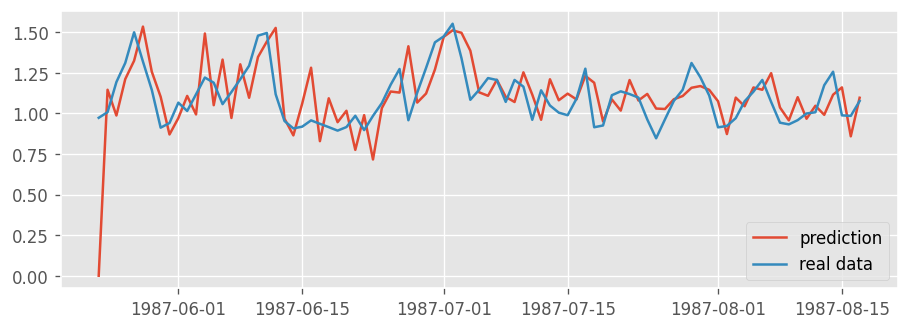

In [276]:
plt.plot(results.predict(),label = 'prediction')
plt.plot(data1[' PICKUP RATIO'],label = 'real data')
plt.legend()
plt.show()

In [244]:
y_forecasted = pred.predicted_mean
y_truth = ts_s_adj['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

NameError: name 'pred' is not defined

In [282]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = data1[' PICKUP RATIO']
predictions = forecast_mean3
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.181644


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [291]:
expected = data1['adjusted_pr']
predictions = forecast1
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.114983


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [292]:
expected = data1[' PICKUP RATIO']
predictions = forecast2
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.114125


/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/wangmeiyi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
